In [1]:
import numpy as np 
import pandas 
import keras as k
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from matplotlib import pyplot
%matplotlib inline
import os
import cv2
from keras import backend as K
K.set_image_dim_ordering('tf')





Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
x_train = []
x_test = []
y_train = []

In [4]:
df_train = pandas.read_csv('./mount/nbs/data/amazon/train_v2.csv')
print(df_train.tail())

        image_name                                           tags
40474  train_40474                                  clear primary
40475  train_40475                                         cloudy
40476  train_40476                      agriculture clear primary
40477  train_40477                 agriculture clear primary road
40478  train_40478  agriculture cultivation partly_cloudy primary


In [5]:
tag_column=[]
labels=[]
for a in df_train['tags'].values:
    tag_column.append(a.split(' '))

# flatten the lists
for sublist in tag_column:
    for sublistitems in sublist:
        if sublistitems not in labels:
            labels.append(sublistitems)
print(labels)

['haze', 'primary', 'agriculture', 'clear', 'water', 'habitation', 'road', 'cultivation', 'slash_burn', 'cloudy', 'partly_cloudy', 'conventional_mine', 'bare_ground', 'artisinal_mine', 'blooming', 'selective_logging', 'blow_down']


In [6]:
label_map = dict()
for i,l in enumerate(labels):
    label_map[l]=i
print(label_map)


{'slash_burn': 8, 'clear': 3, 'blooming': 14, 'primary': 1, 'cloudy': 9, 'conventional_mine': 11, 'water': 4, 'haze': 0, 'cultivation': 7, 'partly_cloudy': 10, 'artisinal_mine': 13, 'habitation': 5, 'bare_ground': 12, 'blow_down': 16, 'agriculture': 2, 'road': 6, 'selective_logging': 15}


In [7]:
for f, tags in df_train.values:
    img = cv2.imread('./mount/nbs/data/amazon/train-jpg/{}.jpg'.format(f))
    targets = np.zeros(17)
    for t in tags.split(' '):
        targets[label_map[t]] = 1 
    x_train.append(cv2.resize(img, (32, 32)))
    y_train.append(targets)

In [8]:
y_train = np.array(y_train, np.uint8)


In [9]:
x_train = np.array(x_train, np.float16)/255.


In [10]:
print(x_train.shape)
print(y_train.shape)


(40479, 32, 32, 3)
(40479, 17)


In [11]:
split = 30000
end = 40479
y_valid = y_train[split:end]
y_train = y_train[:split]
x_valid = x_train[split:end]
x_train = x_train[:split]


In [12]:
print('keras: ', k.__version__)


('keras: ', '1.1.0')


In [24]:
model = Sequential()
model.add(Conv2D(32, 3, 3, activation='relu',input_shape=(32,32, 3)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(Conv2D(128,3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256,3, 3, activation='relu'))
model.add(Conv2D(512,3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(1024,3, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=128,
          nb_epoch=1,
          verbose=1,
          validation_data=(x_valid, y_valid))



In [ ]:
model.save('softmax_categorical_crossentropy_87.h5')


In [28]:

model = Sequential()
model.add(Conv2D(32, 3, 3, activation='relu',input_shape=(32,32, 3)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(Conv2D(128,3, 3, activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256,3, 3, activation='relu'))
model.add(Conv2D(512,3, 3, activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(1024,3, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=128,
          nb_epoch=1,
          verbose=1,
          validation_data=(x_valid, y_valid))


Train on 30000 samples, validate on 10479 samples
Epoch 1/1
30000/30000 [==============================] - 102s - loss: 0.2896 - acc: 0.8932 - val_loss: 0.2300 - val_acc: 0.9088


In [30]:

model = Sequential()
model.add(Conv2D(32, 3, 3, activation='sigmoid',input_shape=(32,32, 3)))
model.add(Conv2D(64, 3, 3, activation='sigmoid'))
model.add(Conv2D(128,3, 3, activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256,3, 3, activation='sigmoid'))
model.add(Conv2D(512,3, 3, activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(1024,3, 3, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=128,
          nb_epoch=1,
          verbose=1,
          validation_data=(x_valid, y_valid))



Train on 30000 samples, validate on 10479 samples
Epoch 1/1
30000/30000 [==============================] - 102s - loss: 0.2882 - acc: 0.8968 - val_loss: 0.2560 - val_acc: 0.9055


In [31]:
model.save('sigmoid_binary_crossentropy_90.h5')

In [ ]:

model.fit(x_train, y_train,
          batch_size=128,
          nb_epoch=1,
          verbose=1,
          validation_data=(x_valid, y_valid))




Train on 30000 samples, validate on 10479 samples
Epoch 1/1
24320/30000 [=======================>......] - ETA: 18s - loss: 0.2664 - acc: 0.9043

In [ ]:
model.save('sigmoid_binary_crossentropy_90.h5')

In [ ]:
model.load_weights('./91.h5')
#labels={'slash_burn': 8, 'clear': 3, 'blooming': 14, 'primary': 1, 'cloudy': 9, 'conventional_mine': 11, 'water': 4, 'haze': 0, 'cultivation': 7, 'partly_cloudy': 10, 'artisinal_mine': 13, 'habitation': 5, 'bare_ground': 12, 'blow_down': 16, 'agriculture': 2, 'road': 6, 'selective_logging': 15}

In [65]:
def predict(image):
    img = cv2.imread(image)
    pyplot.imshow(img)
    test=[]
    test.append(cv2.resize(img, (32, 32)))
    test = np.array(test, np.float16)
    score=model.predict(test)
    
    
    index=score.argmax()
    print(index)
    #print(labels[index])
    #print(score)

    a=score.argsort()[-3:][::-1]
    print(labels[a[0][-3]],a[0][-3])
    print(labels[a[0][-2]],a[0][-2])
    print(labels[a[0][-1]],a[0][-1])
   



    

9
('water', 4)
('primary', 1)
('cloudy', 9)


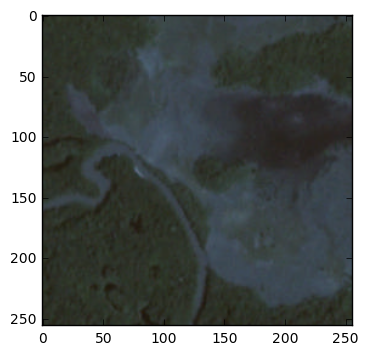

In [66]:
predict('./mount/nbs/data/amazon/train-jpg/train_10.jpg')

9
('blow_down', 16)
('primary', 1)
('cloudy', 9)


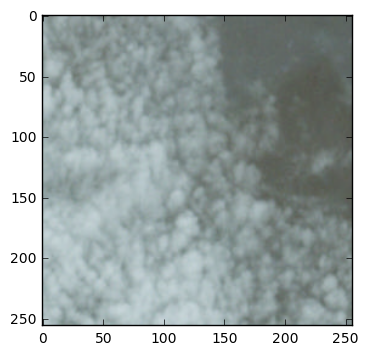

In [67]:
predict('./mount/nbs/data/amazon/train-jpg/train_101.jpg')

9
('blow_down', 16)
('primary', 1)
('cloudy', 9)


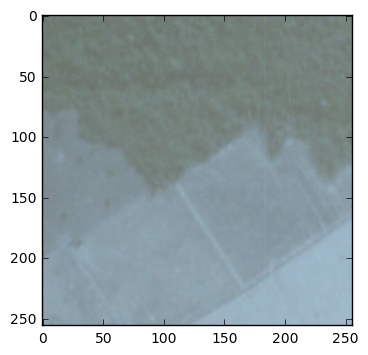

In [68]:
predict('./mount/nbs/data/amazon/train-jpg/train_9.jpg')